In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score

In [4]:
!pip install import_ipynb

You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
import import_ipynb
import func as fd

importing Jupyter notebook from func.ipynb


In [6]:
def plot_feature_importance(model, X_train, figsize=(12, 6)):
    sns.set_style('darkgrid')
    
    # Plot feature importance
    feature_importance = model.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5

    plt.figure(figsize=figsize)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()

In [7]:
from geoband.API import *

GetCompasData('PJT002_train.csv')
GetCompasData('PJT002_test.csv')
GetCompasData('PJT002_validation.csv')
GetCompasData('PJT002_submission.csv')

train = pd.read_csv('PJT002_train.csv')
val = pd.read_csv('PJT002_validation.csv')
test = pd.read_csv('PJT002_test.csv')
sub = pd.read_csv('PJT002_submission.csv')

/opt/app-root/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8,172,173,174,175,176,177,178,179) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
c1 = train.columns[172:]
c2 = train.columns[137:151]
c3 = train.columns[17:137]
X_train = train.drop(c1,1)
X_train = X_train.drop(c2,1)
X_train = X_train.drop(c3,1)
X_train['prcpttn'] = X_train['prcpttn'].fillna(-1)

X_val = val.drop(c1,1)
X_val = X_val.drop(c2,1)
X_val = X_val.drop(c3,1)
X_val['prcpttn'] = X_val['prcpttn'].fillna(-1)

test = test.drop(c1,1)
test = test.drop(c2,1)
test = test.drop(c3,1)
test['prcpttn'] = test['prcpttn'].fillna(-1)

y_train = X_train['fr_yn']
X_train = X_train.drop(['fr_yn', 'id'], 1)
y_val = X_val['fr_yn']
X_val = X_val.drop(['fr_yn', 'id'], 1)
test = test.drop(['fr_yn', 'id'], 1)

NameError: name 'train' is not defined

In [ ]:
all_data = pd.concat([X_train, X_val, test],sort=False)

In [18]:
all_na = (all_data.isnull().sum() / len(all_data))*100
all_na = all_na[all_na<50]
all_na = all_na.drop(all_na[all_na==0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' : all_na})
missing_data.head(30)

,Missing Ratio
bldng_us_clssfctn,49.566716
bldng_us,46.752479
bldng_archtctr,46.732208
ele_engry_us_201507,46.590314
gas_engry_us_201510,46.590314
ele_engry_us_201509,46.590314
gas_engry_us_201509,46.590314
ele_engry_us_201508,46.590314
gas_engry_us_201508,46.590314
ele_engry_us_201506,46.590314


Text(0.5, 1.0, 'Percent missing data by feature')

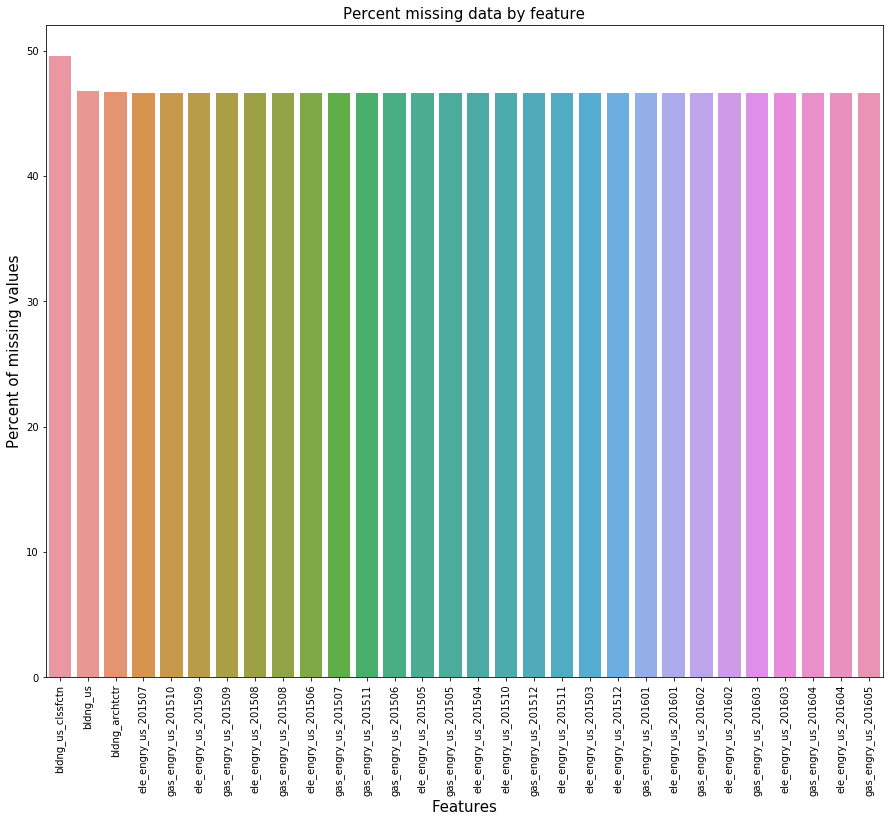

In [19]:
fig, ax = plt.subplots(figsize=(15,12))
plt.xticks(rotation='90')
sns.barplot(x=all_na.index, y=all_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [ ]:
dt_of_fr_pp(all_data)
dt_of_athrztn_pp(all_data)
season_pp(all_data)
flr_pp(all_data)
fr_wthr_fclt_pp(all_data)
bldng_clssfctn_pp(all_data)

In [8]:
train.fr_yn = train.fr_yn.map({'Y':1,'N':0})

In [23]:
train[['bldng_us', 'fr_yn']].groupby(['bldng_us'], as_index=False).mean().sort_values(by='fr_yn', ascending=False)

,bldng_us,fr_yn
3,관광휴게시설,0.700000
24,의료시설,0.666667
26,장례식장,0.666667
33,판매시설,0.653846
1,공동주택,0.619554
15,분뇨.쓰레기처리시설,0.618182
16,수련시설,0.600000
25,자동차관련시설,0.563025
2,공장,0.553011
19,업무시설,0.541985


In [ ]:
bldng_us_pp(all_data)

In [24]:
train[['bldng_archtctr', 'fr_yn']].groupby(['bldng_archtctr'], as_index=False).mean().sort_values(by='fr_yn', ascending=False)

,bldng_archtctr,fr_yn
13,철골철근콘크리트구조,0.651163
11,일반철골구조,0.408669
14,철골콘크리트구조,0.400000
15,철근콘크리트구조,0.367792
17,프리케스트콘크리트구조,0.357143
2,기타강구조,0.305556
1,경량철골구조,0.290112
16,통나무구조,0.272727
4,기타조적구조,0.261364
3,기타구조,0.259259


In [ ]:
bldng_archtctr_pp(all_data)

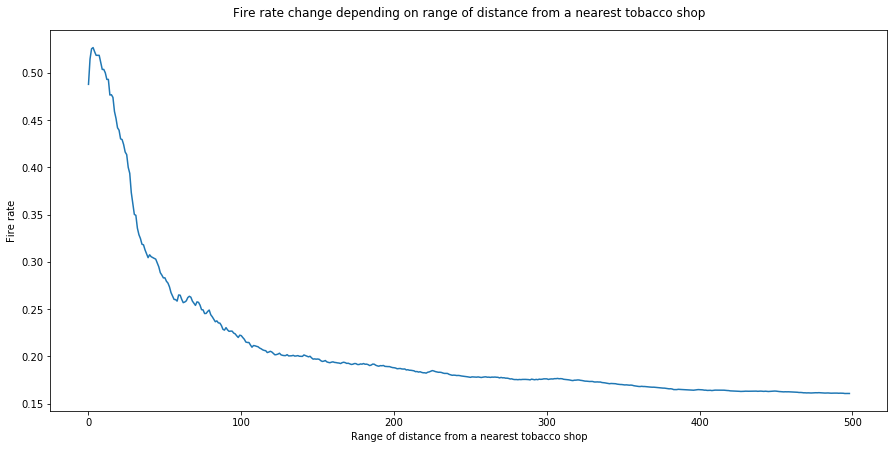

In [27]:
cummulate_fire_ratio = []
for i in range(1, 500):
    cummulate_fire_ratio.append(train[train['tbc_rtl_str_dstnc'] < i]['fr_yn'].sum() / len(train[train['tbc_rtl_str_dstnc'] < i]['fr_yn']))
    
plt.figure(figsize=(15, 7))
plt.plot(cummulate_fire_ratio)
plt.title('Fire rate change depending on range of distance from a nearest tobacco shop', y=1.02)
plt.ylabel('Fire rate')
plt.xlabel('Range of distance from a nearest tobacco shop')
plt.show()

In [25]:
train['tbc_rtl_str_dstnc2'] = pd.qcut(train['tbc_rtl_str_dstnc'],4)
train[['tbc_rtl_str_dstnc2', 'fr_yn']].groupby(['tbc_rtl_str_dstnc2'], as_index=False).mean().sort_values(by='tbc_rtl_str_dstnc2', ascending=True)

,tbc_rtl_str_dstnc2,fr_yn
0,"(-0.001, 527.0]",0.158552
1,"(527.0, 2184.0]",0.148922
2,"(2184.0, 4958.0]",0.111734
3,"(4958.0, 23228.0]",0.098148


In [ ]:
tbc_pp(all_data)

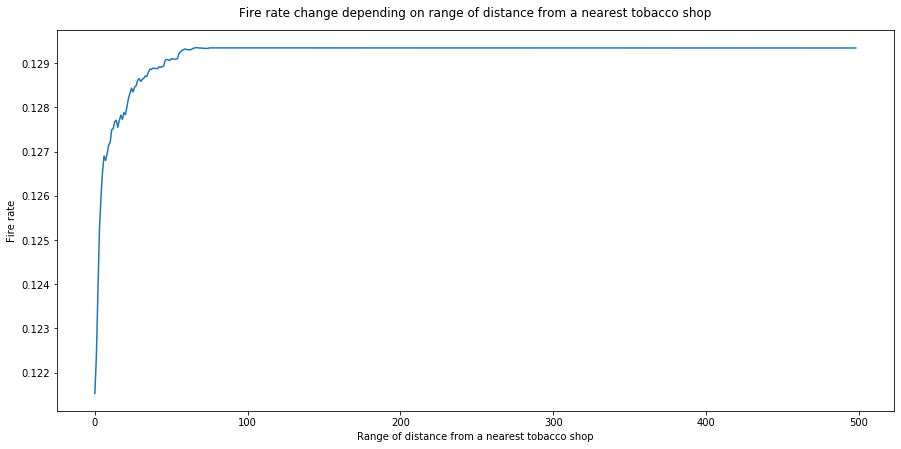

In [9]:
cummulate_fire_ratio = []
for i in range(1, 500):
    cummulate_fire_ratio.append(train[train['bldng_cnt_in_50m'] < i]['fr_yn'].sum() / len(train[train['bldng_cnt_in_50m'] < i]['fr_yn']))
    
plt.figure(figsize=(15, 7))
plt.plot(cummulate_fire_ratio)
plt.title('Fire rate change depending on range of distance from a nearest tobacco shop', y=1.02)
plt.ylabel('Fire rate')
plt.xlabel('Range of distance from a nearest tobacco shop')
plt.show()

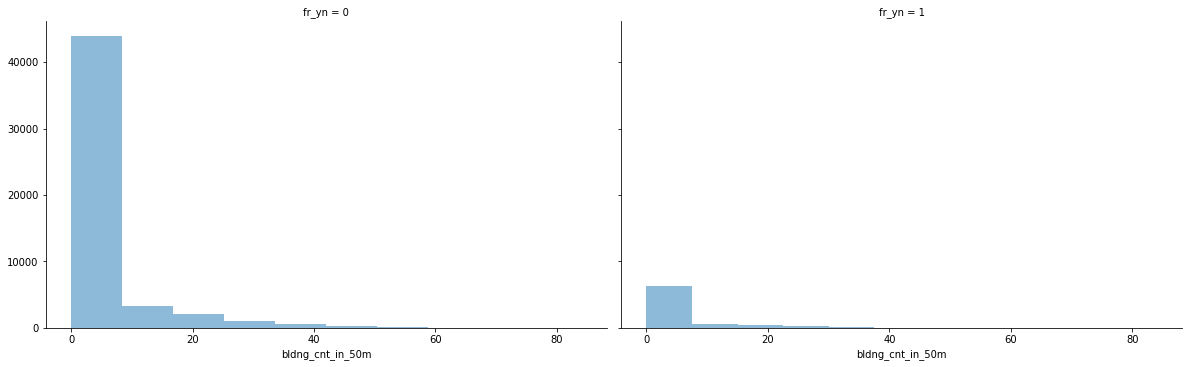

In [12]:
grid = sns.FacetGrid(train, col='fr_yn', size=5.2, aspect=1.6)
grid.map(plt.hist, 'bldng_cnt_in_50m', alpha=.5, bins=10)
grid.add_legend()

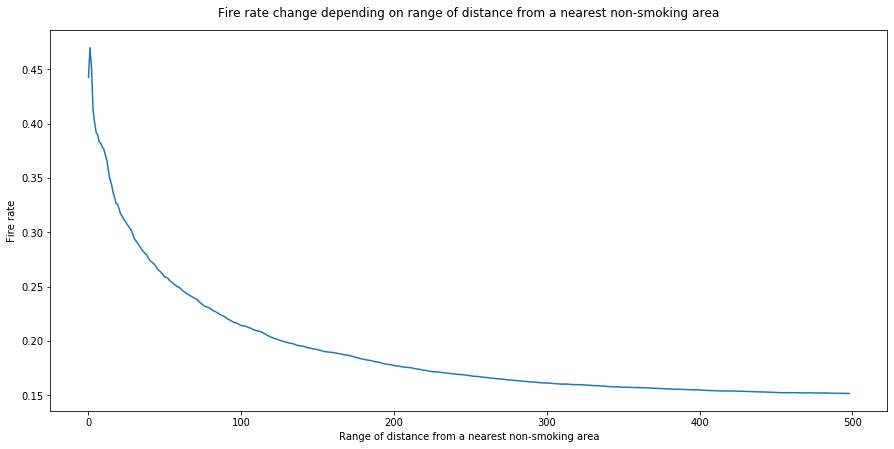

In [28]:
cummulate_fire_ratio = []
for i in range(1, 500):
    cummulate_fire_ratio.append(train[train['no_tbc_zn_dstnc'] < i]['fr_yn'].sum() / len(train[train['no_tbc_zn_dstnc'] < i]['fr_yn']))
    
plt.figure(figsize=(15, 7))
plt.plot(cummulate_fire_ratio)
plt.title('Fire rate change depending on range of distance from a nearest non-smoking area', y=1.02)
plt.ylabel('Fire rate')
plt.xlabel('Range of distance from a nearest non-smoking area')
plt.show()

In [26]:
train['no_tbc_zn_dstnc2'] = pd.qcut(train['no_tbc_zn_dstnc'],4)
train[['no_tbc_zn_dstnc2', 'fr_yn']].groupby(['no_tbc_zn_dstnc2'], as_index=False).mean().sort_values(by='no_tbc_zn_dstnc2', ascending=True)

,no_tbc_zn_dstnc2,fr_yn
0,"(-0.001, 115.0]",0.206585
1,"(115.0, 422.0]",0.100569
2,"(422.0, 1486.5]",0.110269
3,"(1486.5, 16164.0]",0.099595


/opt/app-root/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


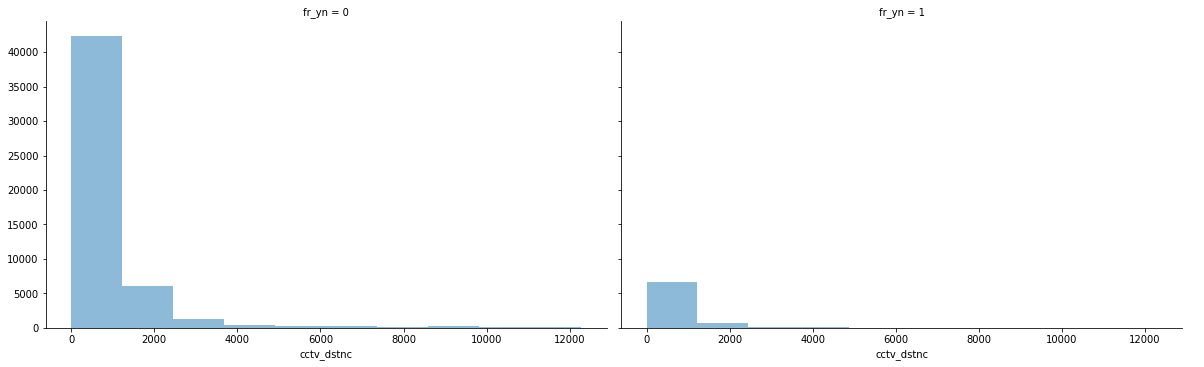

In [29]:
grid = sns.FacetGrid(train, col='fr_yn', size=5.2, aspect=1.6)
grid.map(plt.hist, 'cctv_dstnc', alpha=.5, bins=10)
grid.add_legend()

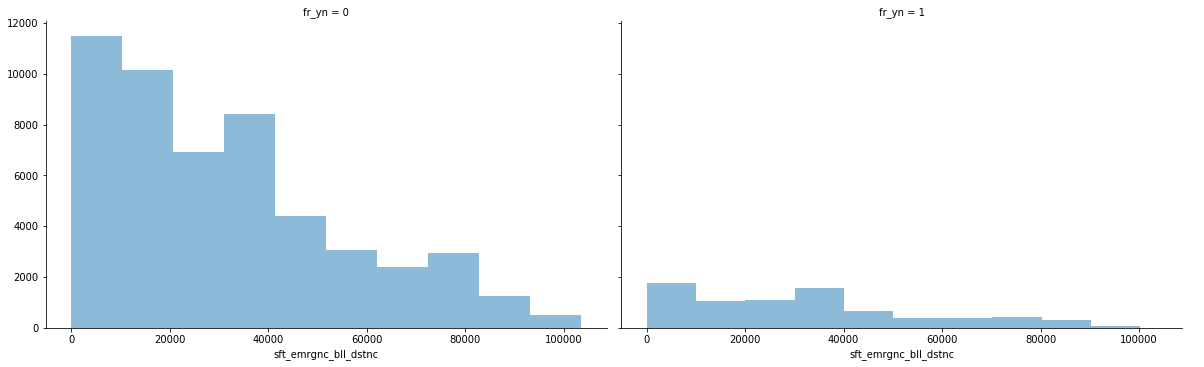

In [30]:
grid = sns.FacetGrid(train, col='fr_yn', size=5.2, aspect=1.6)
grid.map(plt.hist, 'sft_emrgnc_bll_dstnc', alpha=.5, bins=10)
grid.add_legend()

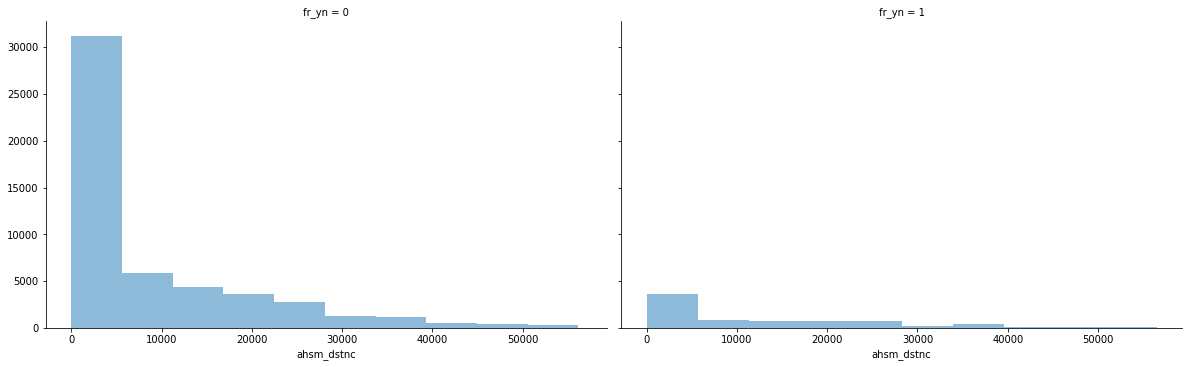

In [31]:
grid = sns.FacetGrid(train, col='fr_yn', size=5.2, aspect=1.6)
grid.map(plt.hist, 'ahsm_dstnc', alpha=.5, bins=10)
grid.add_legend()

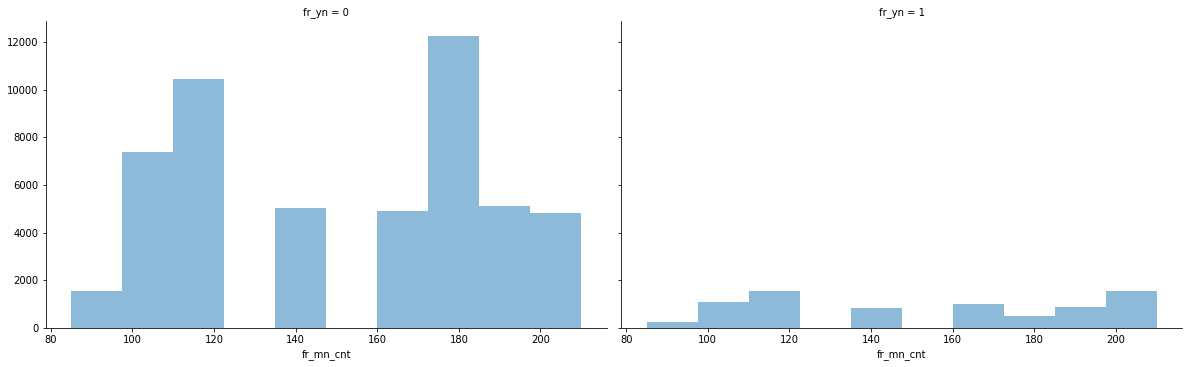

In [32]:
grid = sns.FacetGrid(train, col='fr_yn', size=5.2, aspect=1.6)
grid.map(plt.hist, 'fr_mn_cnt', alpha=.5, bins=10)
grid.add_legend()

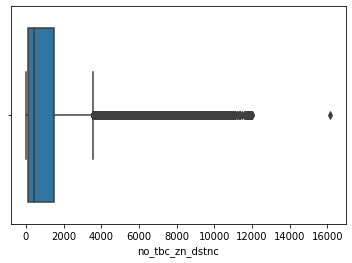

In [19]:
sns.boxplot(x=train['no_tbc_zn_dstnc'])

In [4]:

train.fr_yn = train.fr_yn.map({'Y':1,'N':0})

# 온도에 따른 화재발생률 시각화 
fire_ratio4=[]
for i in range(-14, 39) :
    fire_ratio4.append(train[train['tmprtr']<i]['fr_yn'].sum()/len(train[train['tmprtr']<i]['fr_yn']))
    
plt.figure(figsize=(15,7))
plt.plot(fire_ratio4)
plt.title('Fire rate change depending on tmperature')
plt.ylabel('Fire rate')
plt.xlabel('tmprtr')


NameError: name 'train' is not defined

In [ ]:

# 풍향에 따른 화재발생률 시각화 
fire_ratio3=[]
for i in range(0, 360) :
    fire_ratio3.append(train[train['wnd_drctn']<i]['fr_yn'].sum()/len(train[train['wnd_drctn']<i]['fr_yn']))
    
plt.figure(figsize=(15,7))
plt.plot(fire_ratio3)
plt.title('Fire rate change depending on wind direction')
plt.ylabel('Fire rate')
plt.xlabel('wnd_drctn')


train['wnd_drctn']=train['wnd_drctn'].fillna(0)
train['wnd_drctn'].min()
train['wnd_drctn']=train['wnd_drctn'].astype('int')


In [ ]:

# 풍속에 따른 화재 발생률 시각화
fire_ratio2=[]
for i in range(0, 15) :
    fire_ratio2.append(train[train['wnd_spd']<i]['fr_yn'].sum()/len(train[train['wnd_spd']<i]['fr_yn']))
    
plt.figure(figsize=(15,7))
plt.plot(fire_ratio2)
plt.title('Fire rate change depending on wind speed')
plt.ylabel('Fire rate')
plt.xlabel('wnd_spd')

train['wnd_spd'].max()
train['wnd_spd']=train['wnd_spd'].fillna(0)
f1=lambda x : round(x)
train['wnd_spd' ]=train['wnd_spd'].apply(f1)


In [ ]:

# 습도에 따른 화재 발생률 시각화   
fire_ratio=[]
for i in range(0, 100) :
    fire_ratio.append(train[train['hmdt']<i]['fr_yn'].sum()/len(train[train['hmdt']<i]['fr_yn']))
    
plt.figure(figsize=(15,7))
plt.plot(fire_ratio)
plt.title('Fire rate change depending on humidity')
plt.ylabel('Fire rate')
plt.xlabel('humidity')
